Interacting Proteins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [6]:
c = cptac.Ovarian()

In [9]:
ip = u.get_interacting_proteins('PTEN')
len(ip)
ip.remove('NEDD4') #fix later - 2 cols throw error with wrap ttest when multiindex reduced (in order to graph)

In [4]:
gene = 'PTEN'

In [10]:
mut_type_gbm = c.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = c.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)
prot_and_mutations = c.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)
'''
col_list = list(del_wt.columns[:-1])
i = 2
for col in col_list:
    if col == p:
        prot_and_mutations.column = '2'
        print(prot_and_mutations.column)
    
prot_and_mutations.columns
prot_and_mutations'''
prot_and_mutations

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 98 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV029, 02OV015 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN gene (C:\Users\brit

Name,AKT1_proteomics,CSNK2A1_proteomics,CSNK2A2_proteomics,EGFR_proteomics,INPP4B_proteomics,MAGI3_proteomics,MAST2_proteomics,MDM2_proteomics,MVP_proteomics,PDGFRB_proteomics,...,SHC1_proteomics,SLC9A3R1_proteomics,TP53_proteomics,USP13_proteomics,USP7_proteomics,XIAP_proteomics,PTEN_Mutation,PTEN_Location,PTEN_Mutation_Status,Sample_Status
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,0.273724,0.368045,0.367541,-0.064895,-0.618192,-0.416479,0.312380,NaN,-0.084345,0.364105,...,0.037355,-0.583687,-1.600876,0.437977,0.060232,0.080832,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01OV017,0.190748,0.396824,0.220150,-0.247334,-1.468239,0.307747,0.019005,NaN,0.029734,-0.230823,...,-0.124377,-0.251464,-1.685874,-0.088137,0.321220,-0.268916,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01OV018,0.372622,0.279306,0.559288,-0.039963,-0.103098,-0.429130,0.500336,NaN,-0.314150,-0.073803,...,-0.287175,-0.199414,0.846640,0.647276,0.088056,-0.339740,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01OV023,-0.482296,-0.022015,-0.020506,0.147606,-0.557936,-0.596548,0.308542,NaN,-0.389024,0.331976,...,0.119771,-0.423586,0.419432,-0.206199,-0.045011,-0.072711,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
01OV026,0.045495,0.130425,0.181065,-0.285889,0.677449,-0.141745,0.585852,NaN,-0.865483,0.159245,...,-0.189255,0.584888,-2.459607,-0.315788,-0.182678,0.347953,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17OV001.N,0.104657,0.308312,0.049367,0.583089,-0.059154,0.378932,-0.056443,NaN,0.227034,0.681488,...,-0.232907,-0.098014,-2.350174,-0.345140,0.127228,0.032999,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
17OV002.N,0.498283,0.515361,-0.589520,1.325452,-0.039591,-1.402994,-0.786504,NaN,-0.531956,0.538979,...,0.069424,0.210971,0.008789,-0.976067,-0.386806,0.282724,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
17OV003.N,0.093007,-0.041251,0.698243,0.547125,1.200929,0.359302,0.285554,NaN,-0.321057,1.036888,...,0.360811,-0.545128,-0.556469,0.082417,-0.009592,0.122370,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal


In [11]:
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()
del_wt.columns

Index(['AKT1_proteomics', 'CSNK2A1_proteomics', 'CSNK2A2_proteomics',
       'EGFR_proteomics', 'INPP4B_proteomics', 'MAGI3_proteomics',
       'MAST2_proteomics', 'MDM2_proteomics', 'MVP_proteomics',
       'PDGFRB_proteomics', 'PIK3C3_proteomics', 'PIK3CA_proteomics',
       'PIK3CB_proteomics', 'PIK3CD_proteomics', 'PIK3R1_proteomics',
       'PIK3R2_proteomics', 'PIK3R3_proteomics', 'PREX2_proteomics',
       'PTEN_proteomics', 'PTK2_proteomics', 'ROCK1_proteomics',
       'SHC1_proteomics', 'SLC9A3R1_proteomics', 'TP53_proteomics',
       'USP13_proteomics', 'USP7_proteomics', 'XIAP_proteomics', 'Mutation'],
      dtype='object', name='Name')

In [14]:
cols = list(del_wt.columns[:-1])
#cols.remove('PIK3R1_proteomics')

u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True)

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


,Comparison,P_Value
0,PTEN_proteomics,0.000909
1,PIK3R2_proteomics,0.005865
2,PIK3CA_proteomics,0.008335
3,PIK3CB_proteomics,0.050313
4,PREX2_proteomics,0.060296
5,PTK2_proteomics,0.080941
6,MAGI3_proteomics,0.150601
7,MAST2_proteomics,0.164860
8,PIK3R1_proteomics,0.219977
9,PDGFRB_proteomics,0.231014


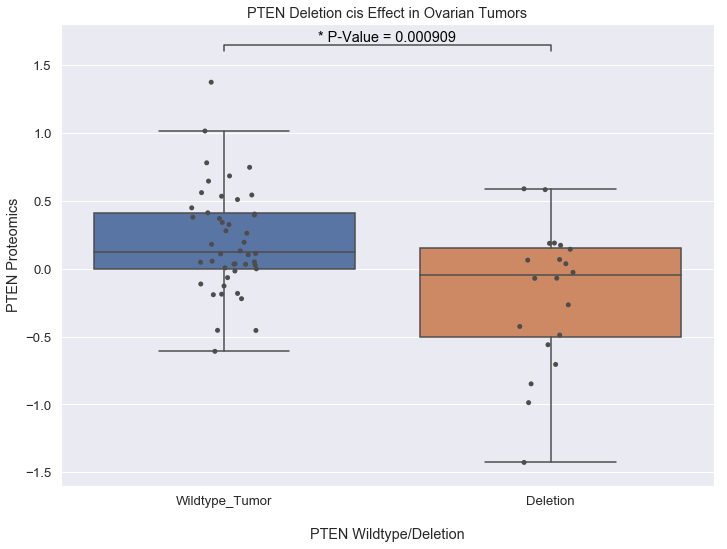

In [16]:
#cis
gene = 'PTEN'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Ovarian Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Proteomics')

format_pval_annotation('* P-Value = 0.000909', 0, 1, 1.6)

plt.show()
plt.clf()
plt.close()

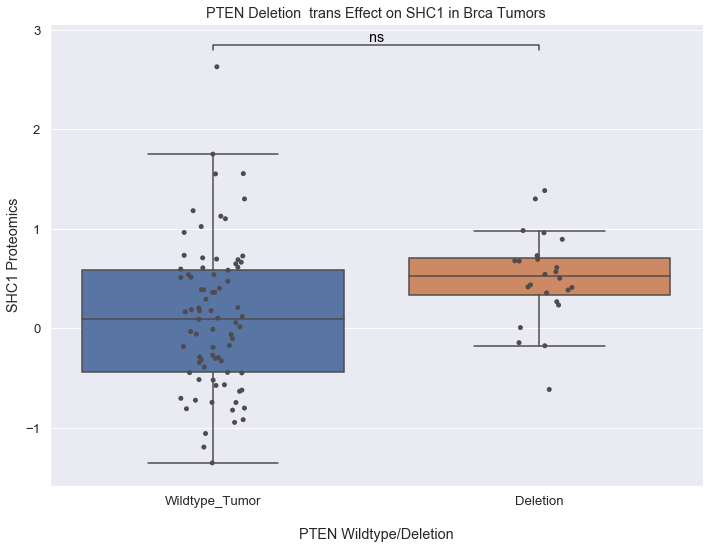

In [53]:
#trans
g = 'SHC1'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Ovarian Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, 2.8)

plt.show()
plt.clf()
plt.close()

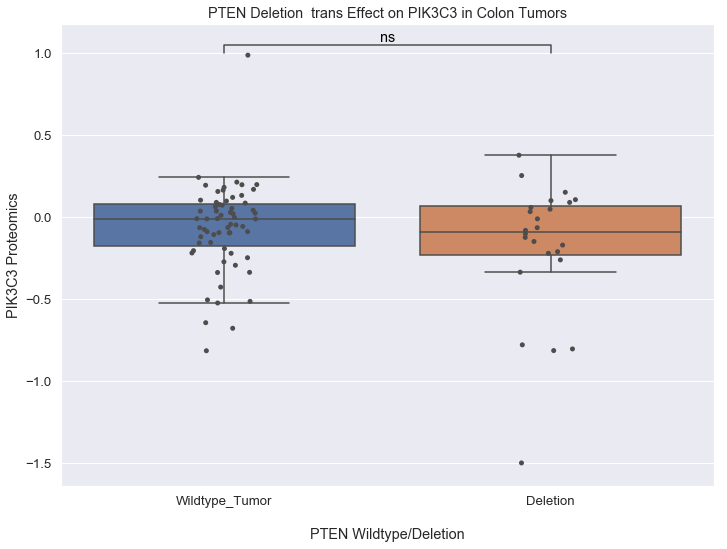

In [21]:
#trans
g = 'EGFR'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Ovarian Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

In [50]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

d = {}

for prot in ip:
    dif = del_med[prot+'_proteomics'] - wt_med[prot+'_proteomics']
    d[prot] = dif
    print(del_med[prot+'_proteomics'], '-', wt_med[prot+'_proteomics'], '=',dif)

df = pd.DataFrame.from_dict(d, orient='index', columns=['Ovarian'])
df

nan - nan = nan
nan - nan = nan
0.36805 - 0.327 = 0.041049999999999975
0.23595 - 0.23705 = -0.0011000000000000176
0.09725 - -0.01765 = 0.1149
0.018000000000000002 - -0.263 = 0.281
-0.72785 - -0.357 = -0.37085
nan - nan = nan
-0.08860000000000001 - -0.37129999999999996 = 0.28269999999999995
-0.0056500000000000005 - 0.27185 = -0.27749999999999997
-3.21955 - -3.33055 = 0.11100000000000021
-0.0551 - -0.6415500000000001 = 0.58645
0.1232 - 0.1078 = 0.015399999999999997
0.15365 - 0.20265 = -0.04899999999999999
0.048350000000000004 - 0.19140000000000001 = -0.14305
0.32915 - 0.17875000000000002 = 0.15039999999999998
-0.7757000000000001 - 0.2323 = -1.008
0.09965 - 0.1254 = -0.02575000000000001
-0.11175000000000002 - 0.1853 = -0.29705000000000004
-0.14405 - -0.2942 = 0.15015
0.20545 - 0.1985 = 0.006949999999999984
0.52275 - 0.09655 = 0.4262
-0.1656 - 0.3201 = -0.4857
0.16620000000000001 - 0.54315 = -0.37695
-0.033249999999999995 - 0.0986 = -0.13185
0.5560499999999999 - 0.54515 = 0.010899999999999

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Brca
MDM2,NaN
CSNK2A1,NaN
PDGFRB,0.04105
PIK3R2,-0.00110
PIK3C3,0.11490
CSNK2A2,0.28100
SLC9A3R1,-0.37085
PIK3R3,NaN
USP13,0.28270
PIK3CA,-0.27750
